In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine, reflect = True)

C:\Users\amdru\AppData\Local\Temp\ipykernel_18032\4179480591.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(autoload_with=engine, reflect = True)


In [11]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(f'The most recent date in the data set is {recent_date[0]}.')

The most recent date in the data set is 2017-08-23.


The date one year from the last date in the data set is 2016-08-23.


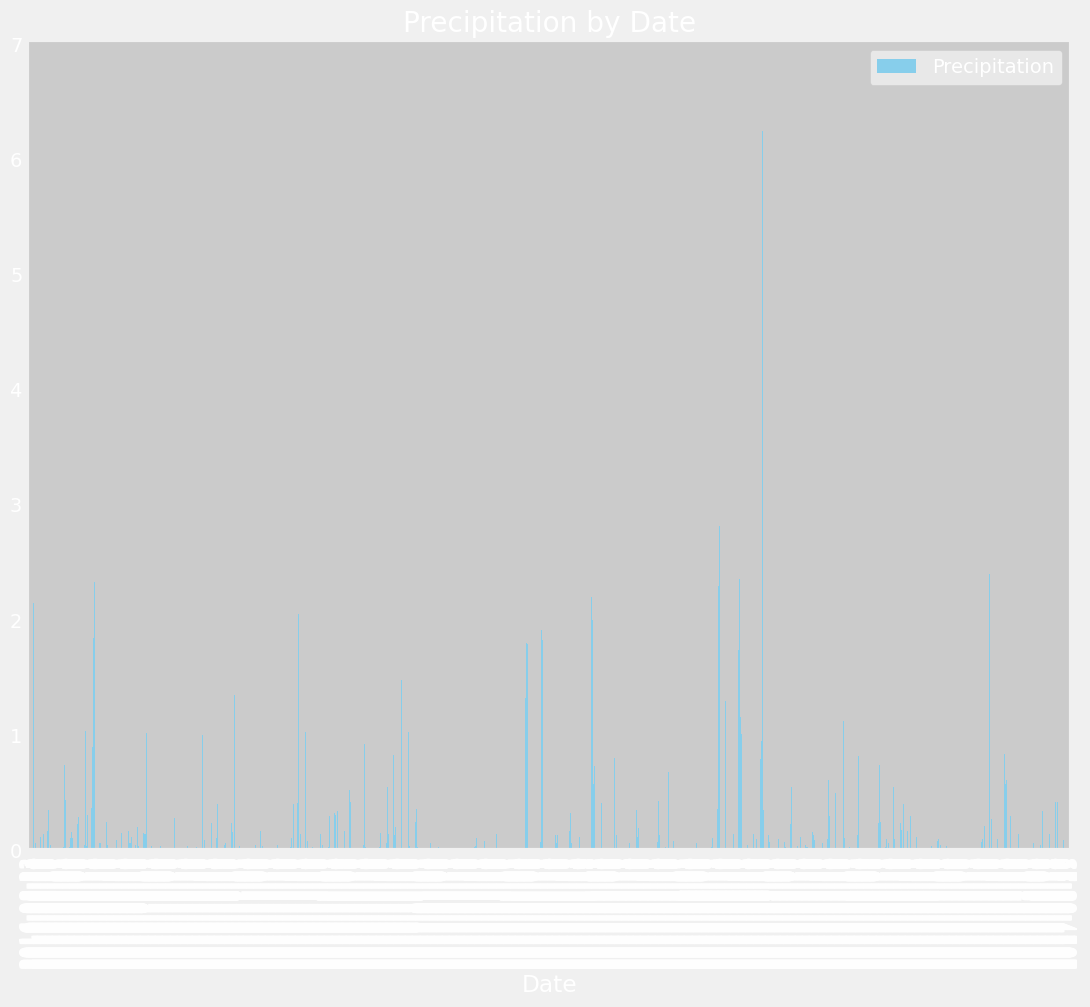

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. (This was done above with recent_date)

# Calculate the date one year from the last date in data set.
query_one_year_earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'The date one year from the last date in the data set is {query_one_year_earlier}.')

# Perform a query to retrieve the data and precipitation scores
query_date_and_precip = session.query(measurements.date, measurements.prcp).filter(measurements.date >= query_one_year_earlier).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_precip_df = pd.DataFrame(query_date_and_precip, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
date_precip_df = date_precip_df.sort_values(by='Date')
date_precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
date_precip_plot = date_precip_df.plot(kind='bar', x='Date', y='Precipitation', rot=90, figsize=(12,10), title='Precipitation by Date', color = 'Skyblue')

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
no_of_stations = session.query(stations.id).count()
print(f'The total number of stations in the dataset is {no_of_stations}.')

The total number of stations in the dataset is 9.


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()

# List the stations and their counts in descending order.
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Take index [0][0] from most_active_stations to find most_active_station_id
most_active_station_id = most_active_stations[0][0]

# Calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station (station id now stored in most_active_station_id)
min_temp_for_most_active_station = session.query(func.min(measurements.tobs)).filter(measurements.station == most_active_station_id).all()
max_temp_for_most_active_station = session.query(func.max(measurements.tobs)).filter(measurements.station == most_active_station_id).all()
avg_temp_for_most_active_station = session.query(func.avg(measurements.tobs)).filter(measurements.station == most_active_station_id).all()
print(f'The lowest temperature recorded for the most active station (station ID: {most_active_station_id}) is {min_temp_for_most_active_station[0][0]} degrees Fahrenheit.')
print(f'The highest temperature recorded for the most active station (station ID: {most_active_station_id}) is {max_temp_for_most_active_station[0][0]} degrees Fahrenheit.')
print(f'The average temperature recorded for the most active station (station ID: {most_active_station_id}) is {round(avg_temp_for_most_active_station[0][0], 2)} degrees Fahrenheit.')


The lowest temperature recorded for the most active station (station ID: USC00519281) is 54.0 degrees Fahrenheit.
The highest temperature recorded for the most active station (station ID: USC00519281) is 85.0 degrees Fahrenheit.
The average temperature recorded for the most active station (station ID: USC00519281) is 71.66 degrees Fahrenheit.


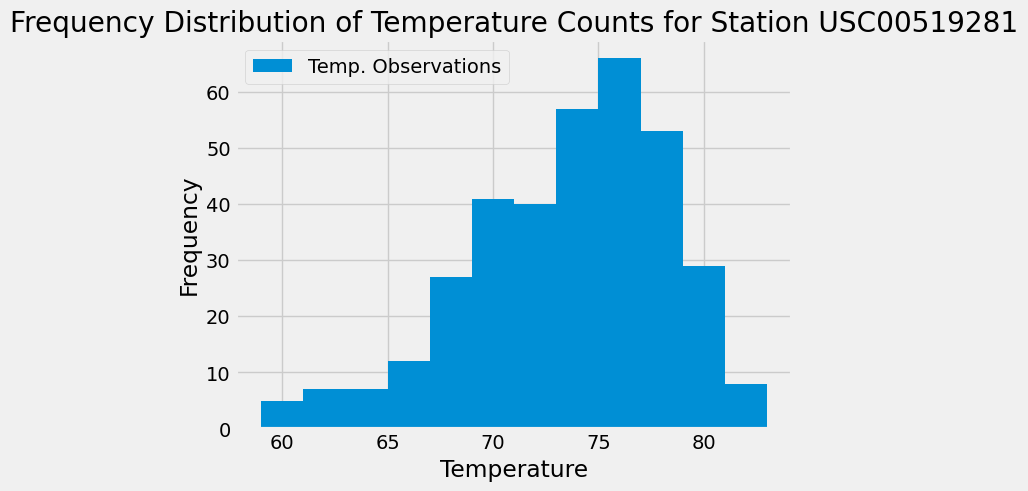

In [52]:
# Query the last 12 months of temperature observation data for the most active station
temp_data = session.query(measurements.tobs).filter(measurements.station == most_active_station_id).filter(measurements.date >= query_one_year_earlier).all()

# Convert the query results to a list
temp_list = list(np.ravel(temp_data))

# Plot the results as a histogram
plt.hist(temp_list, bins=12)
plt.ylabel('Frequency', color = 'black')
plt.xlabel('Temperature', color = 'black')
plt.yticks(color = 'black')
plt.xticks(color = 'black')
plt.title(f'Frequency Distribution of Temperature Counts for Station {most_active_station_id}', color = 'black')
plt.legend(['Temp. Observations'])

# Change the legend text to black so it shows up on the plot
legend = plt.gca().get_legend()
legend.texts[0].set_color('black')

plt.show()


# Close Session

In [53]:
# Close Session
session.close()